# Naive Bayes 

## Análise de Sentimentos

In [1]:
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

![title](tweets.jpeg)

**Ler arquivo de dados e conta a quantidade de linhas**

In [2]:
dataset = pd.read_csv('Tweets_Mg.csv',encoding='utf-8')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 26 columns):
Unnamed: 0                   8199 non-null int64
Created At                   8199 non-null object
Text                         8199 non-null object
Geo Coordinates.latitude     104 non-null float64
Geo Coordinates.longitude    104 non-null float64
User Location                5489 non-null object
Username                     8199 non-null object
User Screen Name             8199 non-null object
Retweet Count                8199 non-null int64
Classificacao                8199 non-null object
Observação                   1 non-null object
Unnamed: 10                  0 non-null float64
Unnamed: 11                  0 non-null float64
Unnamed: 12                  0 non-null float64
Unnamed: 13                  0 non-null float64
Unnamed: 14                  0 non-null float64
Unnamed: 15                  0 non-null float64
Unnamed: 16                  0 non-null float64
Unnamed: 17 

In [4]:
# Expante o tamanho de exibição de coluna de texto
pd.set_option('display.max_colwidth', -1)
dataset.Text.head(100)

0     ���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ                                                          
1     � @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJCSf                                                                              
2     �� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR2Qw                                                                             
3     ��� https://t.co/BnDsO34qK0                                                                                                                 
4     ��� PSOL vai questionar aumento de vereadores e prefeito de BH na Justiça - Politica - Estado de Minas https://t.co/DMg7BGsek5              
5     " bom é bandido morto"\nDeputado Cabo Júlio é condenado e fica inelegível por 10 anos - Politica - Estado de Minas https://t.co/3GfAqvrFHS  
6     "..E 25% dos mineiros dizem não torcer para time nenhum,mesmo dentro de um estado com Atlético-MG e Cruzeiro. Pq

**Excluir Linhas duplicadas**

In [5]:
dataset.drop_duplicates(['Text'],inplace=True)

In [6]:
dataset.count()

Unnamed: 0                   5765
Created At                   5765
Text                         5765
Geo Coordinates.latitude     104 
Geo Coordinates.longitude    104 
User Location                3851
Username                     5765
User Screen Name             5765
Retweet Count                5765
Classificacao                5765
Observação                   1   
Unnamed: 10                  0   
Unnamed: 11                  0   
Unnamed: 12                  0   
Unnamed: 13                  0   
Unnamed: 14                  0   
Unnamed: 15                  0   
Unnamed: 16                  0   
Unnamed: 17                  0   
Unnamed: 18                  0   
Unnamed: 19                  0   
Unnamed: 20                  0   
Unnamed: 21                  0   
Unnamed: 22                  0   
Unnamed: 23                  0   
Unnamed: 24                  0   
dtype: int64

** Removendo Colunas desnecessárias **

In [7]:
for i in dataset.columns.values:
    if i.startswith('Unnamed'):
        dataset.drop(i, axis=1, inplace=True)
        print ('Colunas Deletadas:', i)

Colunas Deletadas: Unnamed: 0
Colunas Deletadas: Unnamed: 10
Colunas Deletadas: Unnamed: 11
Colunas Deletadas: Unnamed: 12
Colunas Deletadas: Unnamed: 13
Colunas Deletadas: Unnamed: 14
Colunas Deletadas: Unnamed: 15
Colunas Deletadas: Unnamed: 16
Colunas Deletadas: Unnamed: 17
Colunas Deletadas: Unnamed: 18
Colunas Deletadas: Unnamed: 19
Colunas Deletadas: Unnamed: 20
Colunas Deletadas: Unnamed: 21
Colunas Deletadas: Unnamed: 22
Colunas Deletadas: Unnamed: 23
Colunas Deletadas: Unnamed: 24


In [8]:
# Visualizando o dataset
dataset.columns

Index(['Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação'],
      dtype='object')

**Distribuição das classes neutros, positivos e negativos**

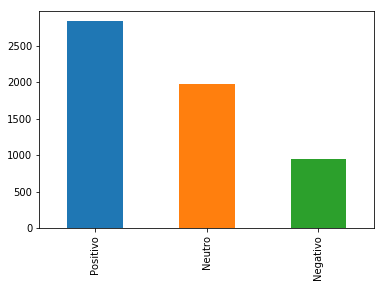

In [10]:
%matplotlib inline
dataset.Classificacao.value_counts().plot(kind='bar')

** Separando tweets e suas classes
**

In [11]:
tweets = dataset['Text']
classes = dataset['Classificacao']

**Gerando o modelo**

In [14]:
vectorizer = CountVectorizer(analyzer="word")
freq_tweets = vectorizer.fit_transform(tweets)

**Cria um modelo usando Naive Bayes Multinomial**

In [18]:
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Avaliação o modelo ##

* Usaremos a técnica de Cross Validation para avaliação dos modelos.
* Esta técnica será usada com 10 folds.

**Fazendo o cross validation do modelo**

In [24]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

** Métricas de validação do modelo**

In [26]:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados,sentimento))

             precision    recall  f1-score   support

   Positivo       0.96      0.88      0.91      2840
   Negativo       0.77      0.89      0.82       951
     Neutro       0.81      0.84      0.82      1974

avg / total       0.87      0.87      0.87      5765



**Apertando o parafuso certo**

In [38]:
vectorizer = CountVectorizer(analyzer="word")
freq_tweets = vectorizer.fit_transform(tweets)
modelo = MultinomialNB(alpha=5)
modelo.fit(freq_tweets,classes)

MultinomialNB(alpha=5, class_prior=None, fit_prior=True)

In [39]:
freq_testes = vectorizer.transform(testes)

In [40]:
# Fazendo a classificação com o modelo treinado.
modelo.predict(freq_testes)

array(['Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro'], dtype='<U8')

In [41]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

In [42]:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados,sentimento))

             precision    recall  f1-score   support

   Positivo       0.89      0.92      0.90      2840
   Negativo       0.84      0.78      0.81       951
     Neutro       0.79      0.79      0.79      1974

avg / total       0.85      0.85      0.85      5765

